In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

# DATASET 1

In [2]:
data_2l = pd.read_csv('column_2C_weka.csv')
data_2l.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data_2l.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
data_2l.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
data_2l['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

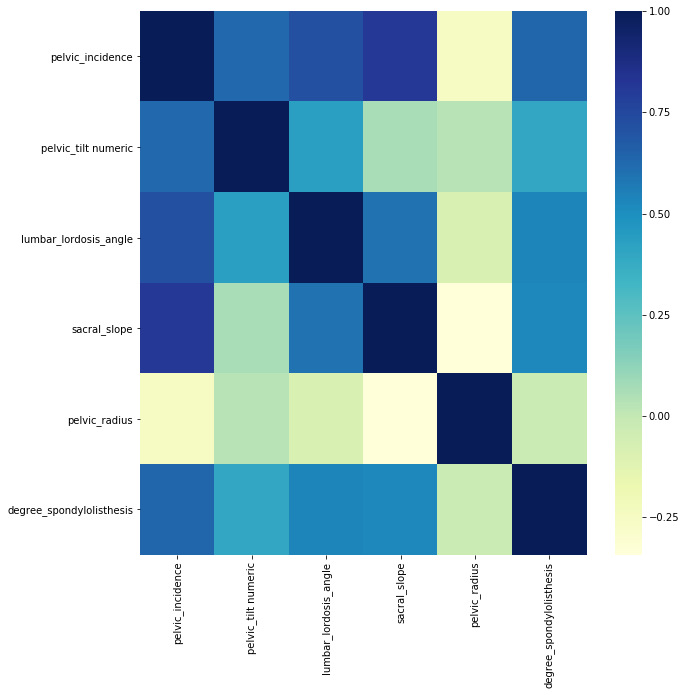

In [6]:
plt.figure(figsize = (10,10))
relation = data_2l.corr()
sns.heatmap(relation, cmap='YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DF3D47240>,
      dtype=object)

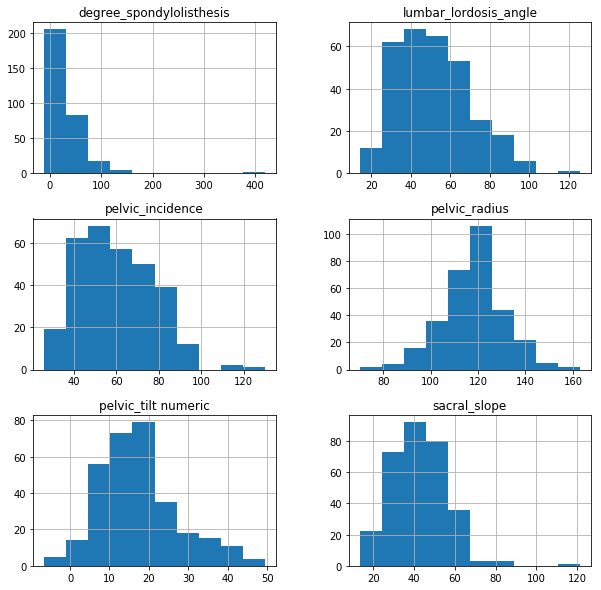

In [7]:
data_2l.hist(figsize = (10,10), bins = 10)

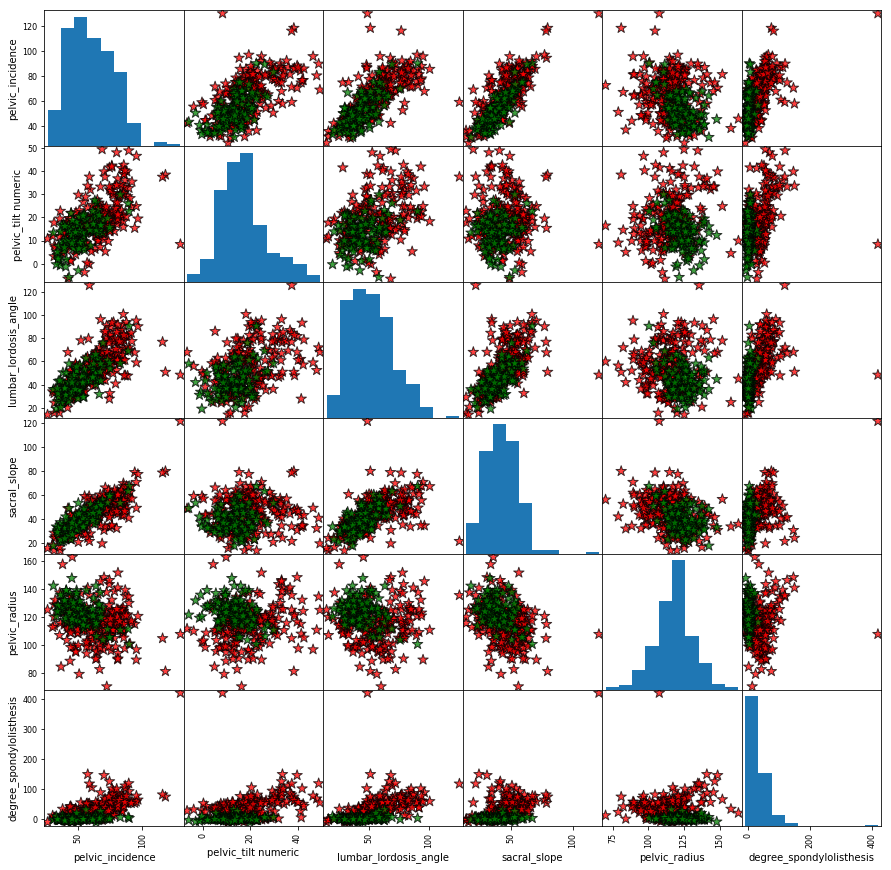

In [8]:
col = ['red' if i=='Abnormal' else 'green' for i in data_2l['class']]
pd.plotting.scatter_matrix(data_2l.iloc[:,:-1], c = col, figsize=(15,15), marker = '*', s = 120,alpha = 0.75,
                           edgecolor = 'Black')
plt.show()

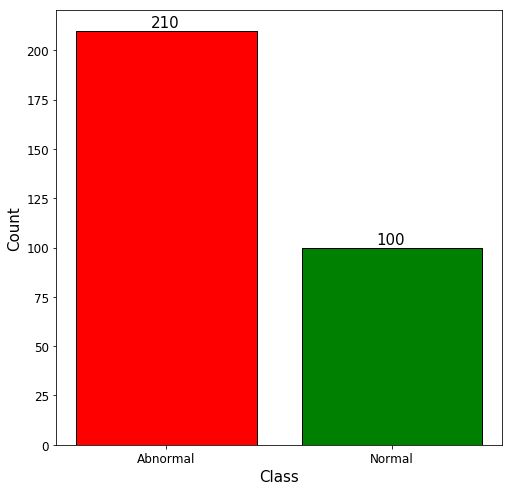

In [9]:
plt.figure(figsize = (8,8))
ax = plt.bar(data_2l['class'].unique(), height = data_2l['class'].value_counts(), edgecolor = 'Black',color = ['Red', 'Green'])
plt.ylabel('Count', fontdict={'fontsize':15})
plt.xlabel('Class', fontdict={'fontsize':15})
for i in ax.patches:
    plt.text(i.get_x() + 0.33, i.get_height() + 1.5, str(i.get_height()) ,fontsize = 15, color = 'Black')
plt.tick_params(labelsize = 12)

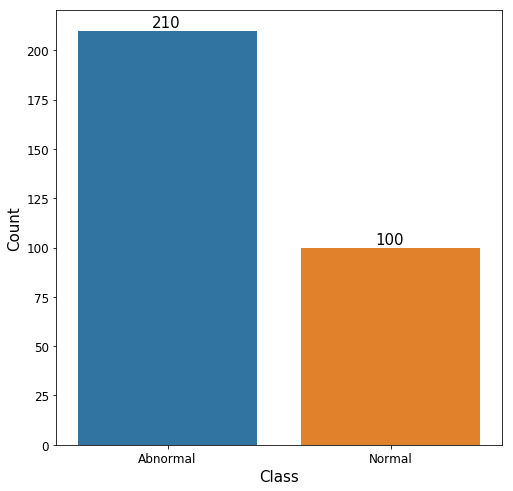

In [10]:
plt.figure(figsize = (8,8))
ax = sns.countplot(x = 'class', data = data_2l)
plt.ylabel('Count', fontdict={'fontsize':15})
plt.xlabel('Class', fontdict={'fontsize':15})
for i in ax.patches:
    plt.text(i.get_x() + 0.33, i.get_height() + 1.5, str(i.get_height()) ,fontsize = 15, color = 'Black')
plt.tick_params(labelsize = 12)

In [11]:
data_2l['class'] = data_2l['class'].map({'Abnormal':0, 'Normal':1})

In [12]:
X = data_2l.iloc[:,:-1].values
y = data_2l.iloc[:, -1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =1 , test_size = 0.3)

# MODEL 1 LOGISTIC REGRESSION

In [14]:
lr = LogisticRegression(solver='liblinear', C = 18)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_test, predict)))
print(classification_report(y_test, predict))

Accuracy = 0.8817204301075269
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.79      0.81      0.80        27

   micro avg       0.88      0.88      0.88        93
   macro avg       0.85      0.86      0.86        93
weighted avg       0.88      0.88      0.88        93



In [15]:
params = {'C':range(1,20) , 'max_iter':range(100,300)}
grid = GridSearchCV(lr, param_grid = params, cv = 10, scoring= 'f1')
grid.fit(X,y)
print("Hyper Parameter Optimization")

Hyper Parameter Optimization


In [16]:
grid.best_params_

{'C': 18, 'max_iter': 100}

# PLOTTING (Scores VS Neighbours)

In [17]:
knn = KNeighborsClassifier(n_neighbors = 18, leaf_size=20)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_test, predict)))
print(classification_report(y_test, predict))

Accuracy = 0.8817204301075269
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.79      0.81      0.80        27

   micro avg       0.88      0.88      0.88        93
   macro avg       0.85      0.86      0.86        93
weighted avg       0.88      0.88      0.88        93



In [18]:
list_scores = []
list_n = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_scores.append(knn.score(X_test, y_test))
    list_n.append(i)

In [19]:
params = {'n_neighbors':range(1,21), 'leaf_size':range(20,40)}
gridknn = GridSearchCV(knn, param_grid = params, cv = 10, scoring= 'accuracy')
gridknn.fit(X,y)
print("Hyper Parameter Optimization")

Hyper Parameter Optimization


In [20]:
gridknn.best_params_

{'leaf_size': 20, 'n_neighbors': 7}

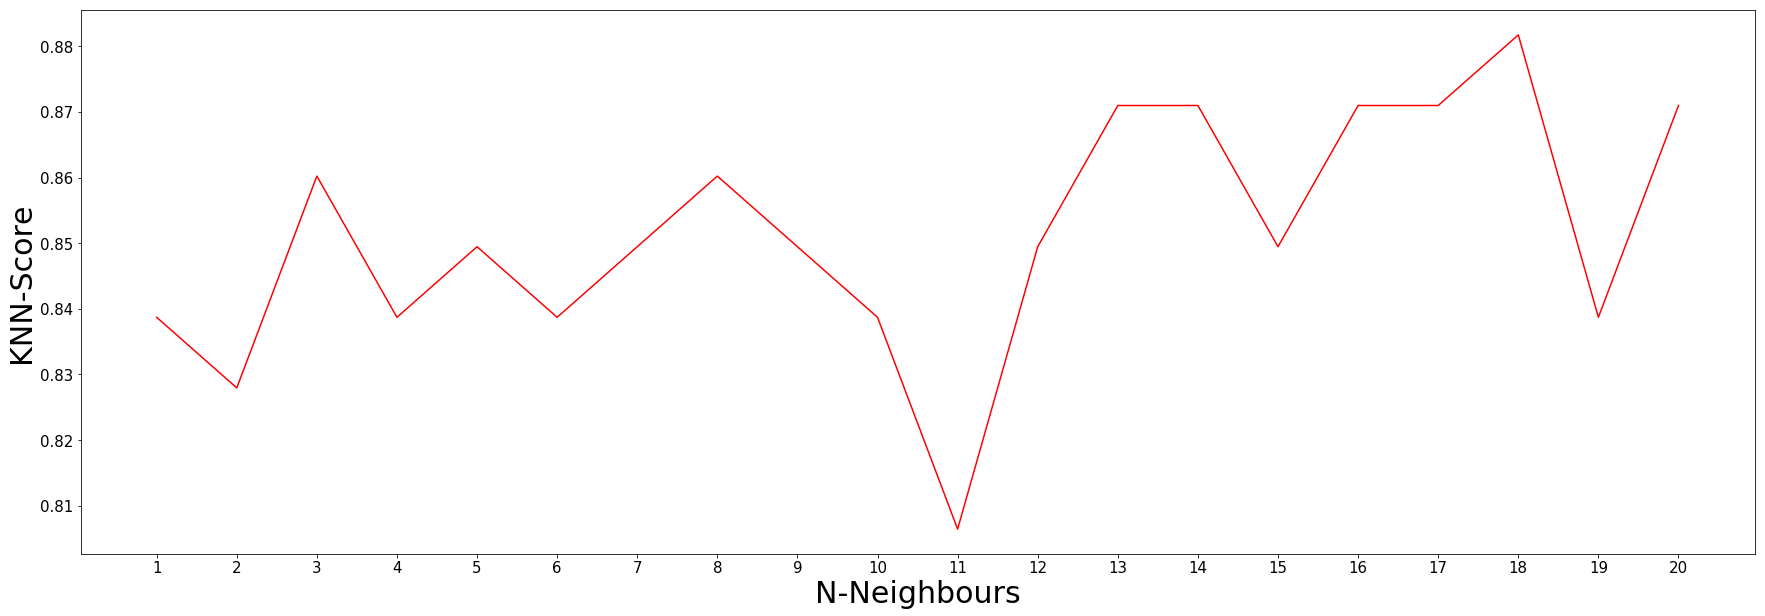

In [21]:
plt.figure(figsize = (30,10))
plt.tick_params(labelsize = 15)
plt.xlabel('N-Neighbours', fontdict={'fontsize':30})
plt.ylabel('KNN-Score', fontdict={'fontsize':30})
plt.xticks(range(1,21,1))
plt.plot(list_n, list_scores, c = 'Red')